In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from locomatopt.sampling import UniformRandom 
from locomatopt.metric import params_matrix
from locomatopt.gradientdescent import GradDescent
from locomatopt.auglmethod import ALM
from locomatopt.matrix import MatrixSH, MatrixWigner, MatrixSNF
from locomatopt.metric import coherence
from locomatopt.metric import boundcoherence
import matplotlib.pyplot as plt

### Example to construct sampling distribution on the sphere with equispaced grid on $\theta$

In [3]:
# Bandwidth
B = 10

# Antenna or normal expansion
case = 'normal'

# Sphere or Rotation Group
basis = 'sh'
# Generate dimension
N, col_comb = params_matrix(types=basis, B=B, case=case)

# Generate sampling points
m = np.arange(21, N, 4).astype(np.int64)  # Samples

# Matrix Parameters
params_mat = {'B': B, 'N': N, 'types': basis,
              'col_comb': col_comb, 'case': case}
p = 9
# Gradient Parameters
params_grad = {'max_iter': 300, 'eps': 1e-6,
               'update': 'fix_theta', 'p_norm': p}

# Path
 
step_size = None

In [4]:

gd_ang_sample = []

# Allocation coherence for samples
gd_coh_sample = []

# Loop for samples
for idx in range(len(m)):
        
    # Generate samples

    unif_rand = UniformRandom(m=m[idx], basis=basis)

    # Gradient 
    gradesc = GradDescent(params_mat=params_mat, params_grad=params_grad)
    res_gradesc = gradesc.run_algo(angles=unif_rand.generate_angles(), step_size=step_size)

    select_mat = {'sh': MatrixSH,
                  'wigner': MatrixWigner,
                  'snf': MatrixSNF}

    mat_gd = select_mat[params_mat['types']](B=params_mat['B'], angles=res_gradesc['angle'],
                                         case=params_mat['case'])

    gd_ang_sample.append(res_gradesc['angle'])
    gd_coh_sample.append(res_gradesc['coherence'])

    print('Sample (m): ', m[idx], ' GD ', res_gradesc['coherence'], coherence(mat_gd.normA))

Sample (m):  21  GD  0.6189446806184586 0.6189446806184586
Sample (m):  25  GD  0.5625394832790667 0.5625394832790667
Sample (m):  29  GD  0.512278721574325 0.512278721574325
Sample (m):  33  GD  0.4682474932297278 0.4682474932297278
Sample (m):  37  GD  0.42985497171584097 0.42985497171584097
Sample (m):  41  GD  0.39636649662507534 0.39636649662507534
Sample (m):  45  GD  0.3670733147250655 0.3670733147250655
Sample (m):  49  GD  0.3413464834286397 0.3413464834286397
Sample (m):  53  GD  0.3186478097196291 0.3186478097196291
Sample (m):  57  GD  0.2985245423576205 0.2985245423576205
Sample (m):  61  GD  0.2805986685669461 0.2805986685669461
Sample (m):  65  GD  0.26455531797075854 0.26455531797075854
Sample (m):  69  GD  0.2501320473460458 0.2501320473460458
Sample (m):  73  GD  0.23710958291558865 0.23710958291558865
Sample (m):  77  GD  0.22530408376399014 0.22530408376399014
Sample (m):  81  GD  0.21456078750156546 0.21456078750156546
Sample (m):  85  GD  0.20474883675596395 0.204

# Plot Coherence and Lower Bound

In [5]:
lower_bound = []
for idx in range(len(m)):
    lower_bound.append(boundcoherence(m[idx], N, B)[params_grad['update']])

<IPython.core.display.Javascript object>


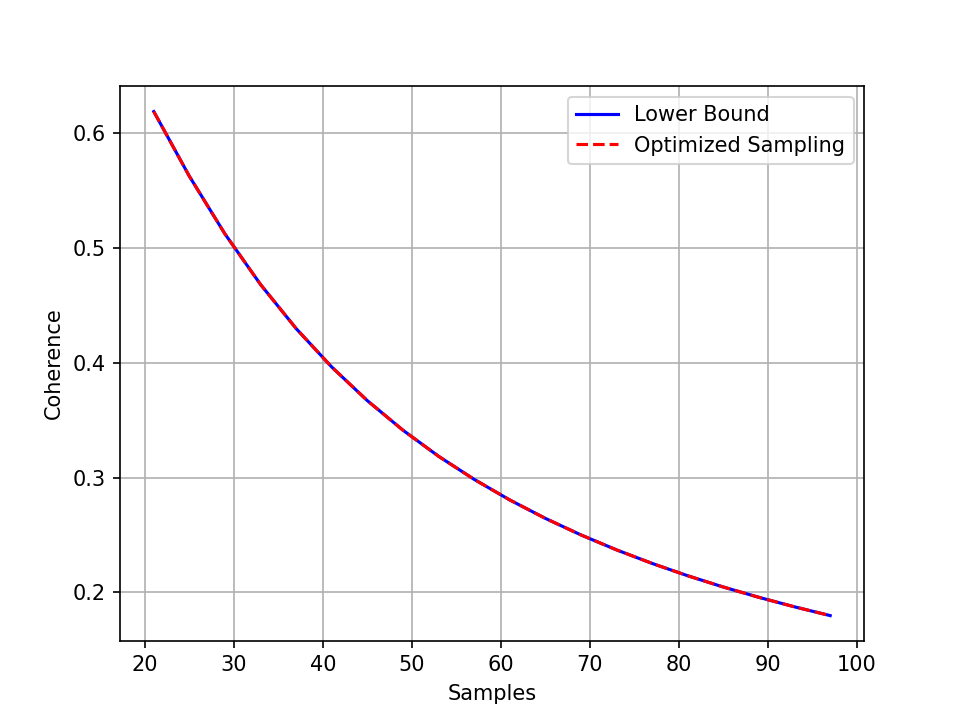

Text(0, 0.5, 'Coherence')

In [12]:
fig, ax = plt.subplots()
ax.plot(m,lower_bound, '-b')
ax.plot(m,gd_coh_sample, '--r')
ax.legend(['Lower Bound', 'Optimized Sampling'])
ax.grid(True)
ax.set_xlabel('Samples')
ax.set_ylabel('Coherence')


In [11]:

 
from mayavi import mlab
mlab.init_notebook()
import numpy as np
# Create a sphere
r = 1.0
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()

## Points
theta_samples = gd_ang_sample [-1]['theta']
phi_samples   = gd_ang_sample [-1]['phi']

xx = np.sin(theta_samples)*np.cos(phi_samples)
yy = np.sin(theta_samples)*np.sin(phi_samples)
zz = np.cos(theta_samples)


mlab.mesh(x , y , z, color=(0.8,0.8,0.8))
s = mlab.points3d(xx, yy, zz, scale_factor=0.05)
s

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01,\x08\x02\x00\x00\x00b\xd5r\x95\x…